<a href="https://colab.research.google.com/github/syamsulrizal123/ECG_Classification/blob/main/ECG_MIT_Arrhythmia_CNNv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks (1)/ECG

/content/drive/MyDrive/Colab Notebooks (1)/ECG


In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('pqrst_arrhythmia_100_150.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,0,-0.025426,-0.009177,-0.003636,-0.008384,-0.015437,-0.024629,-0.025910,-0.017138,-0.008753,-0.003283,-0.000597,-0.003033,-0.000409,0.002113,0.006989,0.009146,0.003723,0.001014,-0.001540,0.005976,0.018139,0.014802,0.001602,-0.008500,-0.008128,0.002227,0.009631,0.016637,0.025767,0.026989,0.023131,0.024407,0.035586,0.043772,0.039098,0.049488,0.064410,0.071143,0.077480,...,0.032257,0.050618,0.063047,0.064866,0.061556,0.068321,0.084740,0.092926,0.090704,0.078593,0.069524,0.070876,0.077193,0.083218,0.083964,0.069732,0.056135,0.055660,0.060260,0.062172,0.063970,0.053253,0.033069,0.038702,0.046693,0.046837,0.049408,0.036958,0.022566,0.026289,0.034903,0.030686,0.029088,0.027589,0.021198,0.022557,0.031348,0.039735,0.032785,100.0
1,1,-0.007367,-0.006987,0.000826,0.008285,0.005424,-0.002325,-0.009707,-0.011741,-0.006184,0.004105,0.001475,-0.006070,-0.010775,-0.012737,-0.004645,0.005581,0.005360,0.000115,0.000076,0.005041,0.007298,0.006939,0.006581,-0.001211,-0.006166,-0.003398,0.004247,0.016499,0.033121,0.038983,0.037024,0.042568,0.050361,0.057769,0.059826,0.056776,0.058818,0.063273,0.067514,...,0.060957,0.065301,0.071922,0.075734,0.066912,0.060946,0.062757,0.064524,0.063715,0.060448,0.052364,0.044664,0.042329,0.037662,0.040673,0.043578,0.033913,0.024663,0.018373,0.022362,0.031179,0.032122,0.023031,0.011857,0.018633,0.025174,0.028895,0.027439,0.011119,0.000510,0.002902,0.007737,0.007371,0.004507,-0.010647,-0.022619,-0.016568,-0.008228,-0.002786,100.0
2,2,-0.000120,0.009905,0.011945,0.006378,-0.006405,-0.008642,-0.003245,-0.000560,-0.000515,-0.010425,-0.024860,-0.013740,-0.000546,-0.000435,-0.000412,-0.002875,-0.007712,-0.007347,0.005453,0.007738,0.007356,0.011946,0.011363,0.013262,0.029985,0.045945,0.046177,0.041330,0.039183,0.047101,0.054676,0.059377,0.058851,0.053350,0.053069,0.057803,0.064810,0.071473,0.065371,...,0.063813,0.055539,0.060097,0.062017,0.061338,0.065646,0.062312,0.049164,0.039111,0.034561,0.035247,0.040900,0.038841,0.029387,0.017886,0.016898,0.028448,0.034517,0.037756,0.028391,0.011972,0.008772,0.013271,0.015104,0.019311,0.015865,0.005094,0.004765,0.009488,0.009032,0.003598,-0.004074,-0.006397,-0.006085,0.001682,0.009097,0.001225,-0.013793,-0.028087,100.0
3,3,-0.013522,-0.015325,-0.014552,-0.008833,-0.003377,-0.005654,-0.007863,-0.024864,-0.031151,-0.019658,-0.011127,-0.003051,-0.005328,-0.010038,-0.007069,0.005733,0.012972,0.009869,0.006860,0.004006,0.006267,0.015898,0.035019,0.048252,0.040896,0.031303,0.037093,0.047651,0.050247,0.047690,0.045232,0.047870,0.050404,0.057776,0.072255,0.071130,0.062513,0.054290,0.044005,...,0.050276,0.057622,0.072108,0.083413,0.091635,0.091963,0.079804,0.073157,0.074338,0.073024,0.069277,0.060738,0.052606,0.049861,0.054744,0.056941,0.059008,0.053515,0.038319,0.036262,0.036877,0.042445,0.047760,0.040379,0.038266,0.046230,0.053851,0.048657,0.038680,0.029184,0.012725,0.011970,0.023774,0.025115,0.016385,0.003069,-0.007109,-0.006809,0.003479,100.0
4,4,-0.009714,0.008160,0.015307,0.007115,-0.000753,-0.003248,-0.005582,-0.002827,-0.000180,-0.000154,-0.005115,-0.009853,-0.009378,-0.001442,0.006135,0.005868,-0.004371,-0.016633,-0.013374,-0.002732,0.007412,0.017033,0.023675,0.024988,0.038623,0.054121,0.061385,0.063256,0.055061,0.052190,0.056953,0.066488,0.070597,0.074461,0.070673,0.059578,0.063911,0.063150,0.057428,...,0.067980,0.082032,0.082889,0.078650,0.072112,0.078316,0.091736,0.099544,0.096981,0.089515,0.074948,0.068535,0.077407,0.080953,0.069377,0.060784,0.060102,0.057021,0.061535,0.065865,0.065005,0.054218,0.043922,0.044092,0.051773,0.056623,0.053755,0.048500,0.036047,0.029154,0.035071,0.038281,0.028889,0.017413,0.008997,0.008483,0.013014,0.017345,0.018969,100.0


In [4]:
df.shape

(8792, 252)

In [10]:
df.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
246           0
247           0
248           0
249           0
250           0
Length: 252, dtype: int64

In [9]:
df.dropna(subset=['246','247','248','249','250'], inplace=True)

In [11]:
df.shape

(8790, 252)

In [ ]:
#tidak perlu di running
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.subplots(figsize=(15,15))
corr=df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,-0.025426,-0.009177,-0.003636,-0.008384,-0.015437,-0.024629,-0.025910,-0.017138,-0.008753,-0.003283,-0.000597,-0.003033,-0.000409,0.002113,0.006989,0.009146,0.003723,0.001014,-0.001540,0.005976,0.018139,0.014802,0.001602,-0.008500,-0.008128,0.002227,0.009631,0.016637,0.025767,0.026989,0.023131,0.024407,0.035586,0.043772,0.039098,0.049488,0.064410,0.071143,0.077480,0.073553,...,0.032257,0.050618,0.063047,0.064866,0.061556,0.068321,0.084740,0.092926,0.090704,0.078593,0.069524,0.070876,0.077193,0.083218,0.083964,0.069732,0.056135,0.055660,0.060260,0.062172,0.063970,0.053253,0.033069,0.038702,0.046693,0.046837,0.049408,0.036958,0.022566,0.026289,0.034903,0.030686,0.029088,0.027589,0.021198,0.022557,0.031348,0.039735,0.032785,100.0
1,-0.007367,-0.006987,0.000826,0.008285,0.005424,-0.002325,-0.009707,-0.011741,-0.006184,0.004105,0.001475,-0.006070,-0.010775,-0.012737,-0.004645,0.005581,0.005360,0.000115,0.000076,0.005041,0.007298,0.006939,0.006581,-0.001211,-0.006166,-0.003398,0.004247,0.016499,0.033121,0.038983,0.037024,0.042568,0.050361,0.057769,0.059826,0.056776,0.058818,0.063273,0.067514,0.076505,...,0.060957,0.065301,0.071922,0.075734,0.066912,0.060946,0.062757,0.064524,0.063715,0.060448,0.052364,0.044664,0.042329,0.037662,0.040673,0.043578,0.033913,0.024663,0.018373,0.022362,0.031179,0.032122,0.023031,0.011857,0.018633,0.025174,0.028895,0.027439,0.011119,0.000510,0.002902,0.007737,0.007371,0.004507,-0.010647,-0.022619,-0.016568,-0.008228,-0.002786,100.0
2,-0.000120,0.009905,0.011945,0.006378,-0.006405,-0.008642,-0.003245,-0.000560,-0.000515,-0.010425,-0.024860,-0.013740,-0.000546,-0.000435,-0.000412,-0.002875,-0.007712,-0.007347,0.005453,0.007738,0.007356,0.011946,0.011363,0.013262,0.029985,0.045945,0.046177,0.041330,0.039183,0.047101,0.054676,0.059377,0.058851,0.053350,0.053069,0.057803,0.064810,0.071473,0.065371,0.052049,...,0.063813,0.055539,0.060097,0.062017,0.061338,0.065646,0.062312,0.049164,0.039111,0.034561,0.035247,0.040900,0.038841,0.029387,0.017886,0.016898,0.028448,0.034517,0.037756,0.028391,0.011972,0.008772,0.013271,0.015104,0.019311,0.015865,0.005094,0.004765,0.009488,0.009032,0.003598,-0.004074,-0.006397,-0.006085,0.001682,0.009097,0.001225,-0.013793,-0.028087,100.0
3,-0.013522,-0.015325,-0.014552,-0.008833,-0.003377,-0.005654,-0.007863,-0.024864,-0.031151,-0.019658,-0.011127,-0.003051,-0.005328,-0.010038,-0.007069,0.005733,0.012972,0.009869,0.006860,0.004006,0.006267,0.015898,0.035019,0.048252,0.040896,0.031303,0.037093,0.047651,0.050247,0.047690,0.045232,0.047870,0.050404,0.057776,0.072255,0.071130,0.062513,0.054290,0.044005,0.046656,...,0.050276,0.057622,0.072108,0.083413,0.091635,0.091963,0.079804,0.073157,0.074338,0.073024,0.069277,0.060738,0.052606,0.049861,0.054744,0.056941,0.059008,0.053515,0.038319,0.036262,0.036877,0.042445,0.047760,0.040379,0.038266,0.046230,0.053851,0.048657,0.038680,0.029184,0.012725,0.011970,0.023774,0.025115,0.016385,0.003069,-0.007109,-0.006809,0.003479,100.0
4,-0.009714,0.008160,0.015307,0.007115,-0.000753,-0.003248,-0.005582,-0.002827,-0.000180,-0.000154,-0.005115,-0.009853,-0.009378,-0.001442,0.006135,0.005868,-0.004371,-0.016633,-0.013374,-0.002732,0.007412,0.017033,0.023675,0.024988,0.038623,0.054121,0.061385,0.063256,0.055061,0.052190,0.056953,0.066488,0.070597,0.074461,0.070673,0.059578,0.063911,0.063150,0.057428,0.051967,...,0.067980,0.082032,0.082889,0.078650,0.072112,0.078316,0.091736,0.099544,0.096981,0.089515,0.074948,0.068535,0.077407,0.080953,0.069377,0.060784,0.060102,0.057021,0.061535,0.065865,0.065005,0.054218,0.043922,0.044092,0.051773,0.056623,0.053755,0.048500,0.036047,0.029154,0.035071,0.038281,0.028889,0.017413,0.008997,0.008483,0.013014,0.017345,0.018969,100.0


In [13]:
X=df.iloc[:, 0:250].values
Y=df.iloc[:, 250].values
print(X)
print(Y)

[[-0.02542562 -0.00917693 -0.00363639 ...  0.03134799  0.03973539
   0.03278507]
 [-0.00736684 -0.00698725  0.00082575 ... -0.01656756 -0.00822841
  -0.00278613]
 [-0.00012026  0.00990506  0.01194521 ...  0.00122532 -0.01379263
  -0.02808657]
 ...
 [ 0.0177517   0.0143856   0.00865933 ... -0.00679559 -0.00899579
  -0.00109615]
 [ 0.01947605  0.01600484  0.01764788 ...  0.01395442  0.00576587
  -0.00203367]
 [ 0.02386899  0.02018782  0.01664679 ... -0.00247788  0.00758711
   0.02465193]]
[100. 100. 100. ... 234. 234. 234.]


In [14]:
Y = Y.astype(int)
print(np.unique(Y))

[100 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118
 119 121 122 123 124 200 201 202 203 205 207 208 209 210 212 213 214 215
 217 219 220 221 222 223 228 230 231 232 233 234]


In [15]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

lb = LabelBinarizer()
Y = lb.fit_transform(Y)
print(Y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
# from sklearn import preprocessing
# X = preprocessing.normalize(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6153, 250)
(2637, 250)
(6153, 48)
(2637, 48)


In [18]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Y_train=Y_train.reshape(-1, Y_train.shape[0], Y_train.shape[1])
# Y_test=Y_test.reshape(-1, Y_test.shape[0], Y_test.shape[1])


In [19]:
print(X_train.shape)
print(X_test.shape)

(6153, 250, 1)
(2637, 250, 1)


In [20]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print(n_timesteps)
print(n_features)
print(n_outputs)

250
1
48


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [22]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

#MODEL 1
# define our Convolutional Neural Network architecture
model = Sequential()
# model.add(Conv1D(16, 3, padding="same", activation="relu", input_shape=(136, 1)))
model.add(Conv1D(16, 3, activation="relu", input_shape=(250, 1)))
# model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
# model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(48, activation='softmax'))

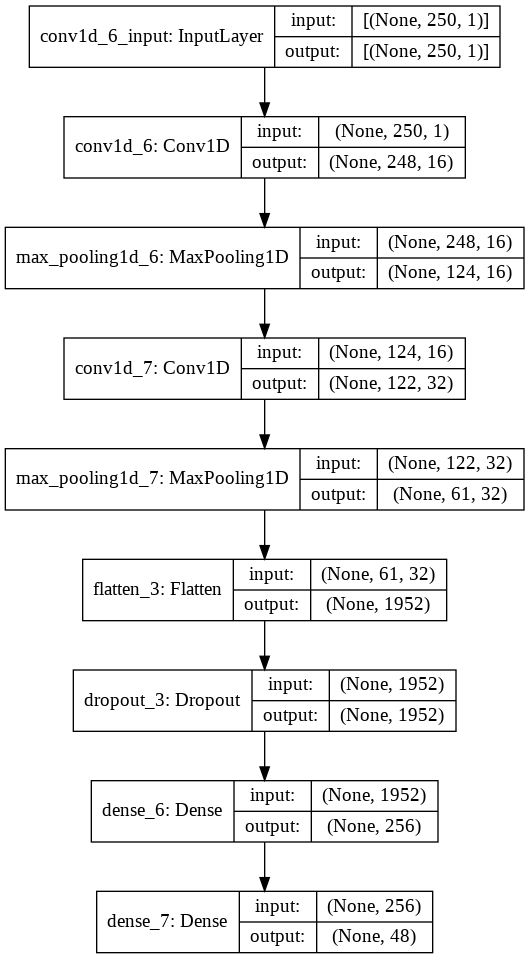

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_100_150.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 198, 16)           64        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 99, 16)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 97, 32)            1568      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 48, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=2,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_pqrst_200samples.h5',
                            #  monitor='val_get_f1',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [23]:
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf

In [24]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-6)
# opt = Adam(lr=1e-3, decay=1e-3)
# opt = SGD(learning_rate=0.01, momentum=0.3)
# opt = RMSprop(learning_rate=0.001, momentum=0.9)
# model.compile(loss="categorical_crossentropy", optimizer=opt, metrics='[get_f1]')
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
# model.compile(loss=tf.keras.losses.KLDivergence(), optimizer=opt, metrics=[get_f1])

[INFO] training network...


In [25]:
# H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=32, callbacks=[es, checkpoint], validation_batch_size=32)
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=32, validation_batch_size=32)

Epoch 1/30
193/193 [==============================] - 4s 17ms/step - loss: 2.6331 - accuracy: 0.3590 - val_loss: 0.5560 - val_accuracy: 0.8654
Epoch 2/30
193/193 [==============================] - 3s 14ms/step - loss: 0.5448 - accuracy: 0.8581 - val_loss: 0.4550 - val_accuracy: 0.8946
Epoch 3/30
193/193 [==============================] - 3s 14ms/step - loss: 0.3652 - accuracy: 0.8952 - val_loss: 0.3170 - val_accuracy: 0.9006
Epoch 4/30
193/193 [==============================] - 3s 15ms/step - loss: 0.2764 - accuracy: 0.9150 - val_loss: 0.3017 - val_accuracy: 0.9116
Epoch 5/30
193/193 [==============================] - 3s 14ms/step - loss: 0.2435 - accuracy: 0.9209 - val_loss: 0.2571 - val_accuracy: 0.9196
Epoch 6/30
193/193 [==============================] - 3s 14ms/step - loss: 0.2045 - accuracy: 0.9228 - val_loss: 0.2644 - val_accuracy: 0.9154
Epoch 7/30
193/193 [==============================] - 3s 14ms/step - loss: 0.1758 - accuracy: 0.9297 - val_loss: 0.2354 - val_accuracy: 0.9268

dict_keys(['loss', 'get_f1', 'val_loss', 'val_get_f1'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


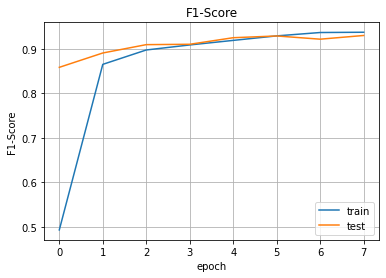

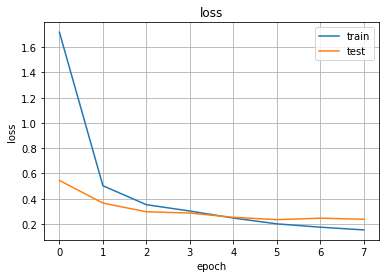

In [ ]:
#jangan di running
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['get_f1'])
plt.plot(H.history['val_get_f1'])
plt.title('F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='bottom right')
plt.grid()
plt.savefig("F1-Score_Conv1D_100_150.jpg")
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.savefig("loss_Conv1D__100_150.jpg")
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


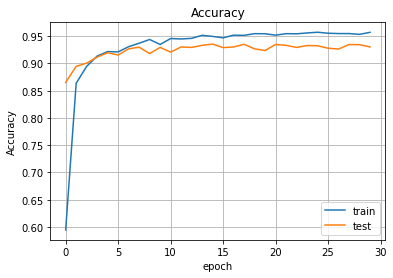

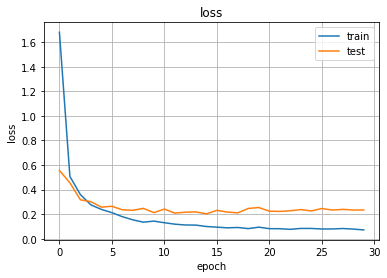

In [26]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='bottom right')
plt.grid()
plt.savefig("Accuracy_Conv1D_Fauzi.jpg")
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid()
plt.savefig("loss_Conv1D_Fauzi.jpg")
plt.show()

In [27]:
from sklearn.metrics import classification_report
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)
target_names=list(map(str,lb.classes_))
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=target_names))

[INFO] evaluating network...
              precision    recall  f1-score   support

         100       1.00      1.00      1.00        51
         101       0.39      0.65      0.49        40
         102       0.26      0.11      0.16        45
         103       0.50      0.98      0.66        50
         104       0.00      0.00      0.00        48
         105       1.00      1.00      1.00        64
         106       0.95      0.93      0.94        56
         107       1.00      1.00      1.00        42
         108       0.89      0.93      0.91        75
         109       0.98      1.00      0.99        56
         111       1.00      1.00      1.00        42
         112       1.00      1.00      1.00        65
         113       0.95      1.00      0.97        38
         114       1.00      0.97      0.99        36
         115       1.00      1.00      1.00        48
         116       1.00      1.00      1.00        62
         117       1.00      1.00      1.00        2

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,-0.025426,-0.009177,-0.003636,-0.008384,-0.015437,-0.024629,-0.025910,-0.017138,-0.008753,-0.003283,-0.000597,-0.003033,-0.000409,0.002113,0.006989,0.009146,0.003723,0.001014,-0.001540,0.005976,0.018139,0.014802,0.001602,-0.008500,-0.008128,0.002227,0.009631,0.016637,0.025767,0.026989,0.023131,0.024407,0.035586,0.043772,0.039098,0.049488,0.064410,0.071143,0.077480,0.073553,...,0.032257,0.050618,0.063047,0.064866,0.061556,0.068321,0.084740,0.092926,0.090704,0.078593,0.069524,0.070876,0.077193,0.083218,0.083964,0.069732,0.056135,0.055660,0.060260,0.062172,0.063970,0.053253,0.033069,0.038702,0.046693,0.046837,0.049408,0.036958,0.022566,0.026289,0.034903,0.030686,0.029088,0.027589,0.021198,0.022557,0.031348,0.039735,0.032785,100.0
1,-0.007367,-0.006987,0.000826,0.008285,0.005424,-0.002325,-0.009707,-0.011741,-0.006184,0.004105,0.001475,-0.006070,-0.010775,-0.012737,-0.004645,0.005581,0.005360,0.000115,0.000076,0.005041,0.007298,0.006939,0.006581,-0.001211,-0.006166,-0.003398,0.004247,0.016499,0.033121,0.038983,0.037024,0.042568,0.050361,0.057769,0.059826,0.056776,0.058818,0.063273,0.067514,0.076505,...,0.060957,0.065301,0.071922,0.075734,0.066912,0.060946,0.062757,0.064524,0.063715,0.060448,0.052364,0.044664,0.042329,0.037662,0.040673,0.043578,0.033913,0.024663,0.018373,0.022362,0.031179,0.032122,0.023031,0.011857,0.018633,0.025174,0.028895,0.027439,0.011119,0.000510,0.002902,0.007737,0.007371,0.004507,-0.010647,-0.022619,-0.016568,-0.008228,-0.002786,100.0
2,-0.000120,0.009905,0.011945,0.006378,-0.006405,-0.008642,-0.003245,-0.000560,-0.000515,-0.010425,-0.024860,-0.013740,-0.000546,-0.000435,-0.000412,-0.002875,-0.007712,-0.007347,0.005453,0.007738,0.007356,0.011946,0.011363,0.013262,0.029985,0.045945,0.046177,0.041330,0.039183,0.047101,0.054676,0.059377,0.058851,0.053350,0.053069,0.057803,0.064810,0.071473,0.065371,0.052049,...,0.063813,0.055539,0.060097,0.062017,0.061338,0.065646,0.062312,0.049164,0.039111,0.034561,0.035247,0.040900,0.038841,0.029387,0.017886,0.016898,0.028448,0.034517,0.037756,0.028391,0.011972,0.008772,0.013271,0.015104,0.019311,0.015865,0.005094,0.004765,0.009488,0.009032,0.003598,-0.004074,-0.006397,-0.006085,0.001682,0.009097,0.001225,-0.013793,-0.028087,100.0
3,-0.013522,-0.015325,-0.014552,-0.008833,-0.003377,-0.005654,-0.007863,-0.024864,-0.031151,-0.019658,-0.011127,-0.003051,-0.005328,-0.010038,-0.007069,0.005733,0.012972,0.009869,0.006860,0.004006,0.006267,0.015898,0.035019,0.048252,0.040896,0.031303,0.037093,0.047651,0.050247,0.047690,0.045232,0.047870,0.050404,0.057776,0.072255,0.071130,0.062513,0.054290,0.044005,0.046656,...,0.050276,0.057622,0.072108,0.083413,0.091635,0.091963,0.079804,0.073157,0.074338,0.073024,0.069277,0.060738,0.052606,0.049861,0.054744,0.056941,0.059008,0.053515,0.038319,0.036262,0.036877,0.042445,0.047760,0.040379,0.038266,0.046230,0.053851,0.048657,0.038680,0.029184,0.012725,0.011970,0.023774,0.025115,0.016385,0.003069,-0.007109,-0.006809,0.003479,100.0
4,-0.009714,0.008160,0.015307,0.007115,-0.000753,-0.003248,-0.005582,-0.002827,-0.000180,-0.000154,-0.005115,-0.009853,-0.009378,-0.001442,0.006135,0.005868,-0.004371,-0.016633,-0.013374,-0.002732,0.007412,0.017033,0.023675,0.024988,0.038623,0.054121,0.061385,0.063256,0.055061,0.052190,0.056953,0.066488,0.070597,0.074461,0.070673,0.059578,0.063911,0.063150,0.057428,0.051967,...,0.067980,0.082032,0.082889,0.078650,0.072112,0.078316,0.091736,0.099544,0.096981,0.089515,0.074948,0.068535,0.077407,0.080953,0.069377,0.060784,0.060102,0.057021,0.061535,0.065865,0.065005,0.054218,0.043922,0.044092,0.051773,0.056623,0.053755,0.048500,0.036047,0.029154,0.035071,0.038281,0.028889,0.017413,0.008997,0.008483,0.013014,0.017345,0.018969,100.0


In [41]:
# test_data=df.iloc
test_data=df.iloc[0:10, 0:250].values
test_data.shape

(10, 250)

In [43]:
test_data=test_data.reshape(test_data.shape[0], test_data.shape[1], 1)

#uncomment yang bawah jika test 1 data
# test_data=test_data.reshape(test_data.shape[0], 1)

test_data.shape

(10, 250, 1)

In [44]:
predictions = model.predict(test_data)
# predictions

In [45]:
lb.classes_[predictions.argmax(axis=1)]

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])